<a href="https://colab.research.google.com/github/valilhan/Data_science/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np 

/content/drive/MyDrive/Colab Notebooks/data.csv

In [246]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")

In [247]:

print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [248]:
df.dropna()
df.dropna(how='all', axis='columns')
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [249]:
df = df.rename(columns={'diagnosis':'Label'})

In [250]:
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

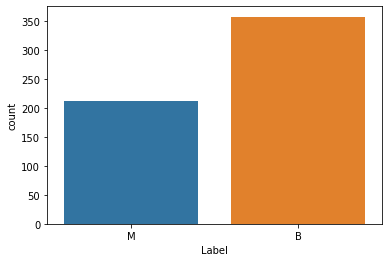

In [251]:
sns.countplot(x="Label",data=df)

In [252]:
print("Distribution of data: ", df['Label'].value_counts())

Distribution of data:  B    357
M    212
Name: Label, dtype: int64


In [253]:
y = df["Label"].values

In [254]:
print(np.unique(y))

['B' 'M']


In [255]:
from sklearn.preprocessing import LabelEncoder

In [256]:
labelencoder = LabelEncoder()

In [257]:
Y = labelencoder.fit_transform(y)

In [258]:
print(np.unique(Y))

[0 1]


In [259]:
X = df.drop(labels=["Label","id"],axis=1)

In [260]:

print(X.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [261]:
from sklearn.preprocessing import MinMaxScaler

In [262]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [263]:
scaler = MinMaxScaler()

In [264]:
scaler.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler()

In [265]:
X = scaler.transform(X)

In [266]:
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.59846245 0.41886396        nan]
 [0.64314449 0.27257355 0.61578329 ... 0.23358959 0.22287813        nan]
 [0.60149557 0.3902604  0.59574321 ... 0.40370589 0.21343303        nan]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.12872068 0.1519087         nan]
 [0.64456434 0.66351031 0.66553797 ... 0.49714173 0.45231536        nan]
 [0.03686876 0.50152181 0.02853984 ... 0.25744136 0.10068215        nan]]


In [267]:
from sklearn.model_selection import train_test_split 

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [269]:
print(X_train.shape)

(426, 31)


In [270]:
print(X_test.shape)

(143, 31)


In [271]:
from keras.models import Sequential

In [272]:
from keras.layers import Dense, Activation, Dropout

In [273]:
model = Sequential()

In [274]:
model.add(Dense(16,input_dim=29,activation='relu'))

In [275]:
model.add(Dropout(0.2))

In [276]:
model.add(Dense(1))

In [277]:
model.add(Activation('sigmoid'))

In [278]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']
              )

In [279]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                480       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
 activation_7 (Activation)   (None, 1)                 0         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________
None


In [280]:
history = model.fit(X_train,y_train,verbose=1,epochs=100,batch_size=65,validation_data=(X_test,y_test))

Epoch 1/100


ValueError: ignored